In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [28]:
orbit_df = pd.read_csv('../asteroid-impacts/orbits.csv')

In [29]:
print(orbit_df.columns)

Index(['Object Name', 'Object Classification', 'Epoch (TDB)',
       'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)',
       'Perihelion Argument (deg)', 'Node Longitude (deg)',
       'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
       'Aphelion Distance (AU)', 'Orbital Period (yr)',
       'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference',
       'Asteroid Magnitude'],
      dtype='object')


In [30]:
# I want to get at those asteroid magnitudes, but lack of numpy nimble-ness stands as an obstacle.

In [31]:
am = orbit_df[ 'Asteroid Magnitude' ].astype( np.float )

ValueError: could not convert string to float: 'n/a'

In [32]:
# So I tried the other included data set for honest numbers not in need of conversion.

In [40]:
df = pd.read_csv('../asteroid-impacts/impacts.csv')

In [41]:
cip = df[ 'Cumulative Impact Probability' ]

In [42]:
# I wanted to look at the distribution of these cumulative probabilities, and got a strictly decreasing histogram,
# heavily loaded at the bottom.  I played with the bins and the range, and was never terribly happy with the 
# resulting picture

In [43]:
plt.hist( cip, bins = 15, range = ( 1.10e-10, 9.999e-6 ), color='red' )

(array([ 269.,   48.,   32.,   35.,   22.,   10.,   14.,   10.,    4.,
           6.,   13.,    5.,    8.,   10.,    3.]),
 array([  1.10000000e-10,   6.66702667e-07,   1.33329533e-06,
          1.99988800e-06,   2.66648067e-06,   3.33307333e-06,
          3.99966600e-06,   4.66625867e-06,   5.33285133e-06,
          5.99944400e-06,   6.66603667e-06,   7.33262933e-06,
          7.99922200e-06,   8.66581467e-06,   9.33240733e-06,
          9.99900000e-06]),
 <a list of 15 Patch objects>)

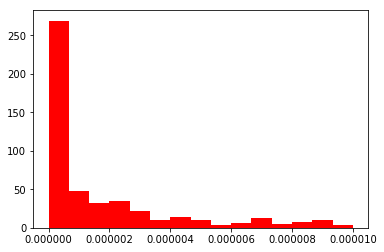

In [44]:
plt.show()

In [45]:
# Despondant, I resolved to look elsewhere.  Velocity seemed a good place, and this data set also included asteroid
# magnitude -- locked away in type conversion hell in the other .csv.  But these suckers are truly numeric in this
# .csv!  HUZZAH!

In [46]:
av = df[ 'Asteroid Velocity' ]

In [47]:
am = df[ 'Asteroid Magnitude' ]

In [48]:
plt.hist( av, color = 'red' )

(array([  63.,  155.,  187.,  141.,   74.,   36.,   20.,    3.,    1.,    3.]),
 array([  0.34 ,   4.253,   8.166,  12.079,  15.992,  19.905,  23.818,
         27.731,  31.644,  35.557,  39.47 ]),
 <a list of 10 Patch objects>)

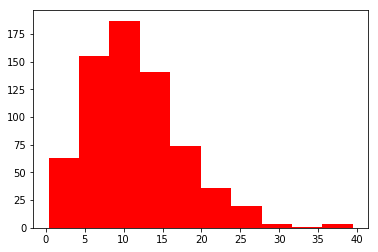

In [49]:
plt.show()

In [50]:
# Strong right skewness in the velocities.  Might normal up if you hit 'em with our old friend, the natural log. But
# let's see what other secrets we can beat out of these asteroids.

In [51]:
plt.hist( am, color = 'blue' )

(array([   2.,    5.,   13.,   18.,   45.,  115.,  184.,  195.,   92.,   14.]),
 array([ 15.6,  17.2,  18.8,  20.4,  22. ,  23.6,  25.2,  26.8,  28.4,
         30. ,  31.6]),
 <a list of 10 Patch objects>)

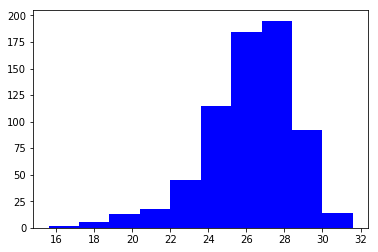

In [52]:
plt.show()

In [53]:
# Would you look at that?  The magnitudes look like the left-right mirror image of the velocities.  If I knew more 
# physics, I bet there would be a fun story to tell.  What's fascinating and ultra-groovy is that these data (the
# magnitudes and velocities) are pairwise matched by asteroid.  Who could possibly resist looking at a scatterplot?
# The answer:  not me.

In [54]:
plt.scatter( x = am, y = av )

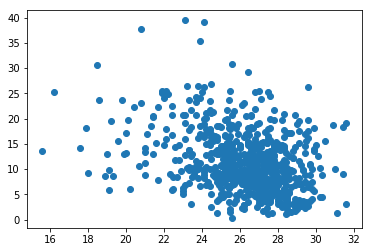

In [55]:
plt.show()

In [56]:
# I am seeing a weak negative association here, which I'd be loathe to call linear except for the irresistible
# homogeneity of the points.  I'd publish a regression line and a bookfull of warnings thick enough to scare even
# the least risk-averse statistician from using that sucker for prediction.

In [120]:
# Data supplied via https://www.kaggle.com/nasa/asteroid-impacts